In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv(r'C:\Users\Maksim\Desktop\datasets\TelecomChurn.csv')

In [98]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [99]:
df_group = df[['State', 'Customer service calls']]
df_heat = df[['State', 'Churn']]

In [100]:
df_group

,State,Customer service calls
0,LA,1
1,IN,4
2,NY,4
3,SC,2
4,HI,1
...,...,...
662,WI,2
663,AL,1
664,VT,3
665,WV,1


<Axes: xlabel='State'>

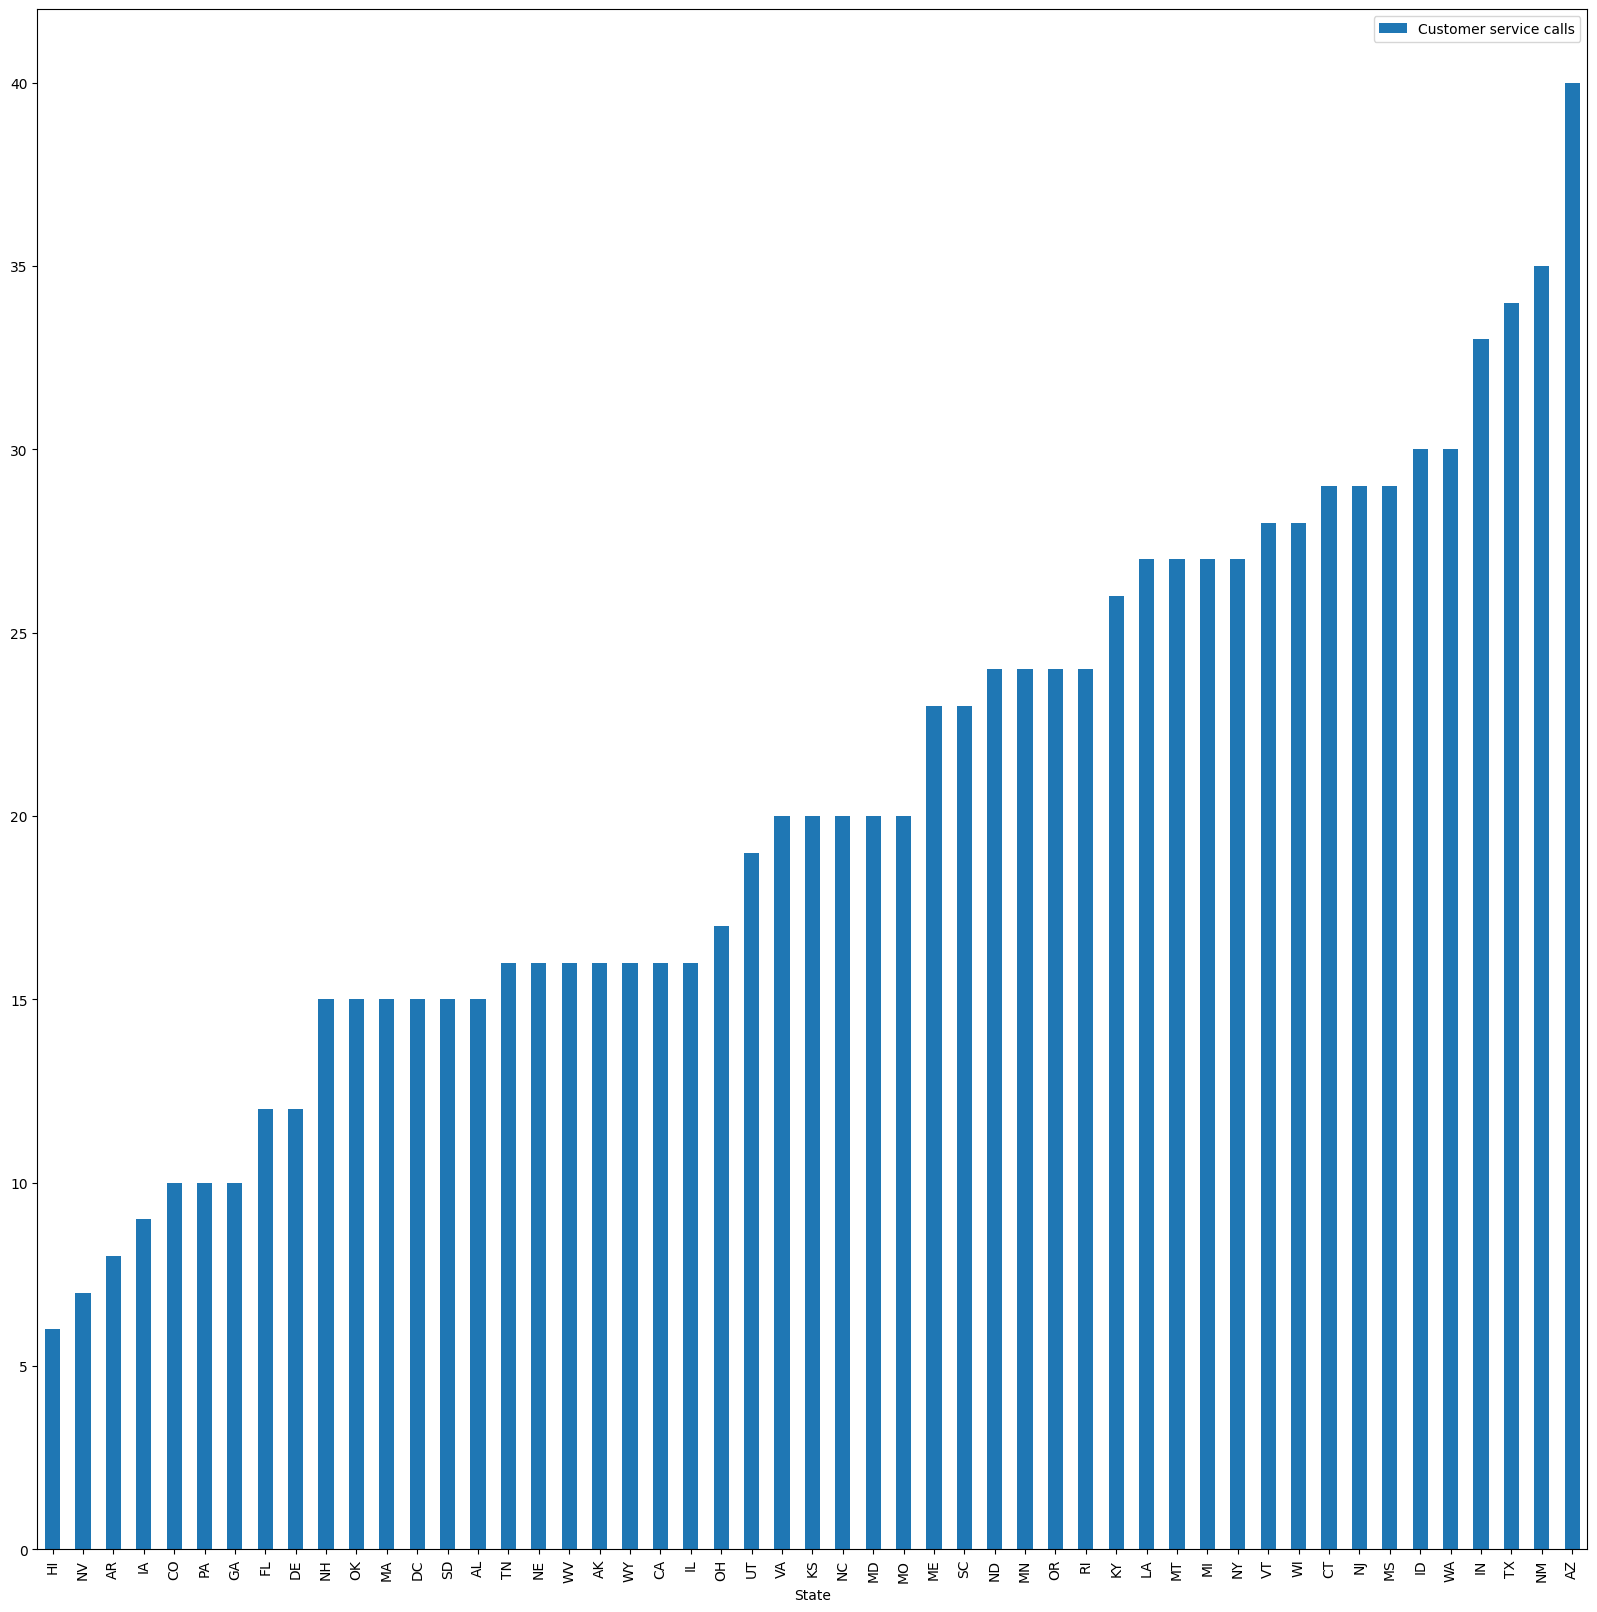

In [101]:
#Сумма всех звонков в поддержку в каждом штате
df_group = df_group.groupby(['State']).sum()
df_group = df_group.sort_values(by=['Customer service calls'])
df_group.plot.bar(figsize=(20, 20))

<Axes: xlabel='State'>

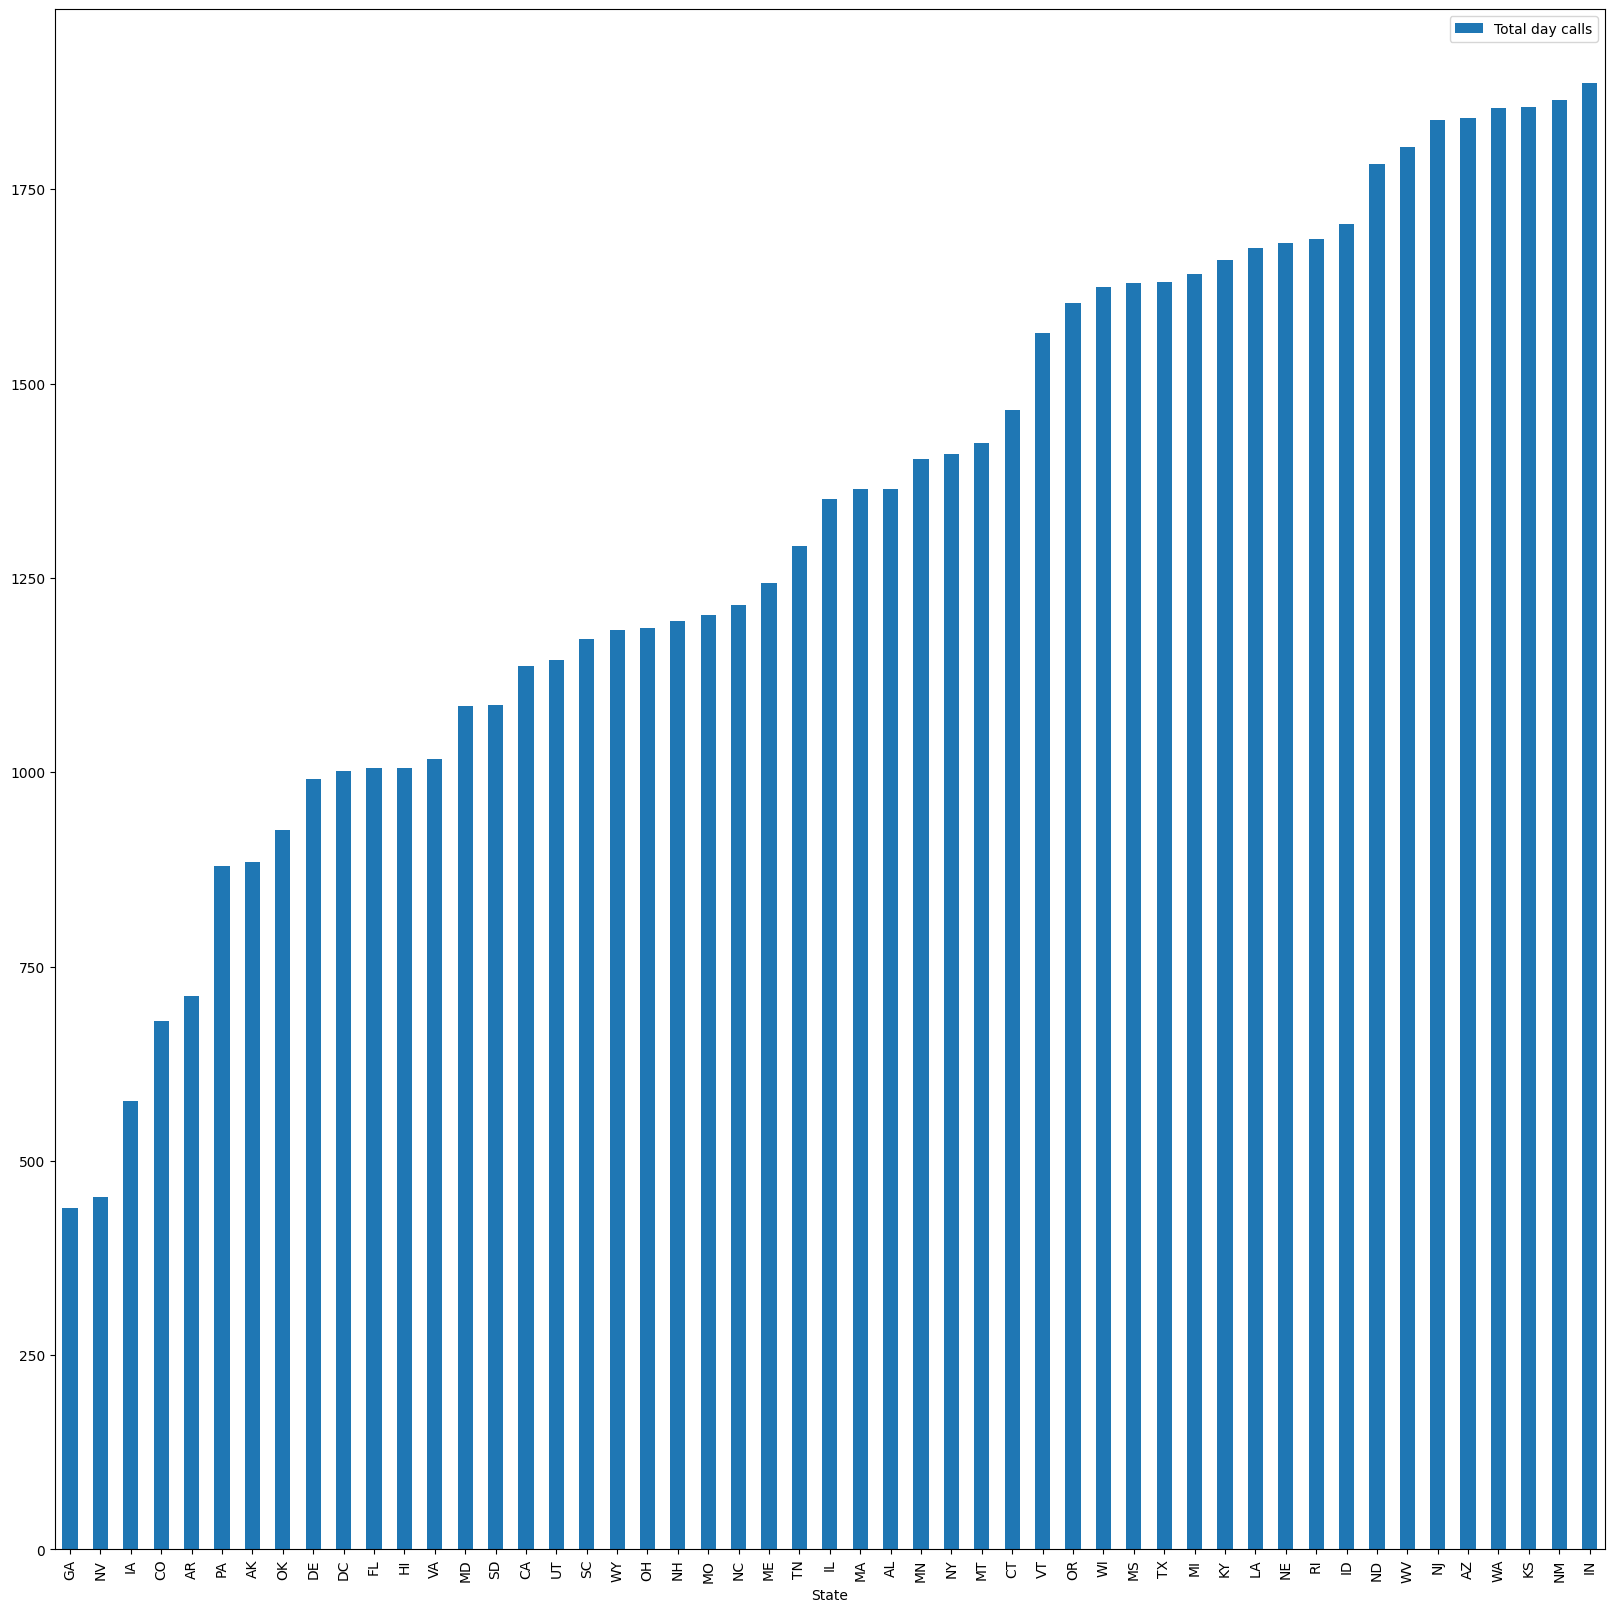

In [87]:
#Сумма всех дневных звонков в каждом штате
df_group = df[['State', 'Total day calls']]
df_group = df_group.groupby(['State']).sum()
df_group = df_group.sort_values(by=['Total day calls'])
df_group.plot.bar(figsize=(20, 20))

C:\Users\Maksim\AppData\Local\Temp\ipykernel_5852\4106508830.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['Int_Voice'] = np.where(df['Voice mail plan']=='No', 0, 1)
C:\Users\Maksim\AppData\Local\Temp\ipykernel_5852\4106508830.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['Int_Plan'] = np.where(df['International plan']=='No', 0, 1)
C:\Users\Maksim\AppData\Local\Temp\ipykernel_5852\4106508830.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is depr

<Axes: ylabel='State'>

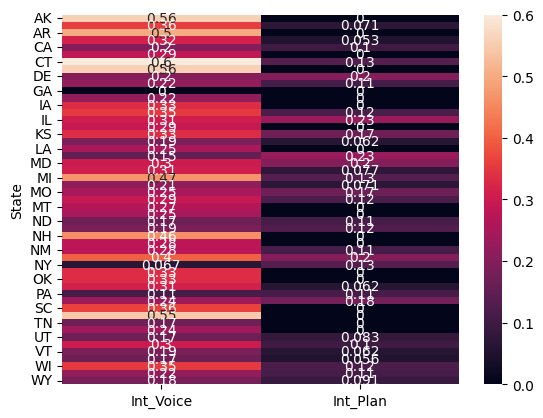

In [102]:
# Не очень информативынй график. Какой то корреляции между наличием голосовой почты и международного тарифа нету. 
# По графику видно, что во всех штатах либо вообще отсутствуют пользователи у которых есть международный тариф, либо их количество очень маленькое. 
df_group = df[['State', 'Voice mail plan', 'International plan']]
df_group['Int_Voice'] = np.where(df['Voice mail plan']=='No', 0, 1)
df_group['Int_Plan'] = np.where(df['International plan']=='No', 0, 1)
df_group = df_group.groupby(['State']).mean()
sns.heatmap(df_group, annot=True)

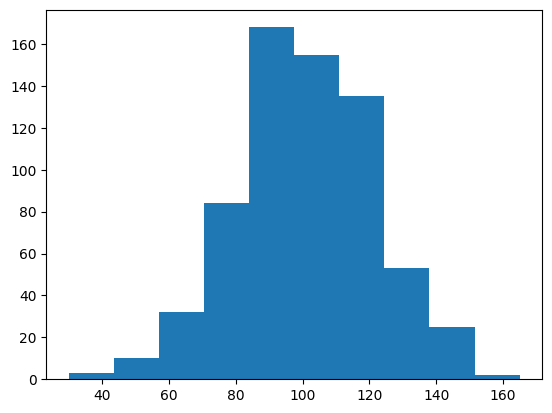

In [90]:
# Гистограмма общего количеств звонков в день. На графике видно, что большинство людей звонят от 90 до 120 раз в день.
# Меньше всего звонили 10 раз, больше вего 160 раз
plt.hist(df['Total day calls'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

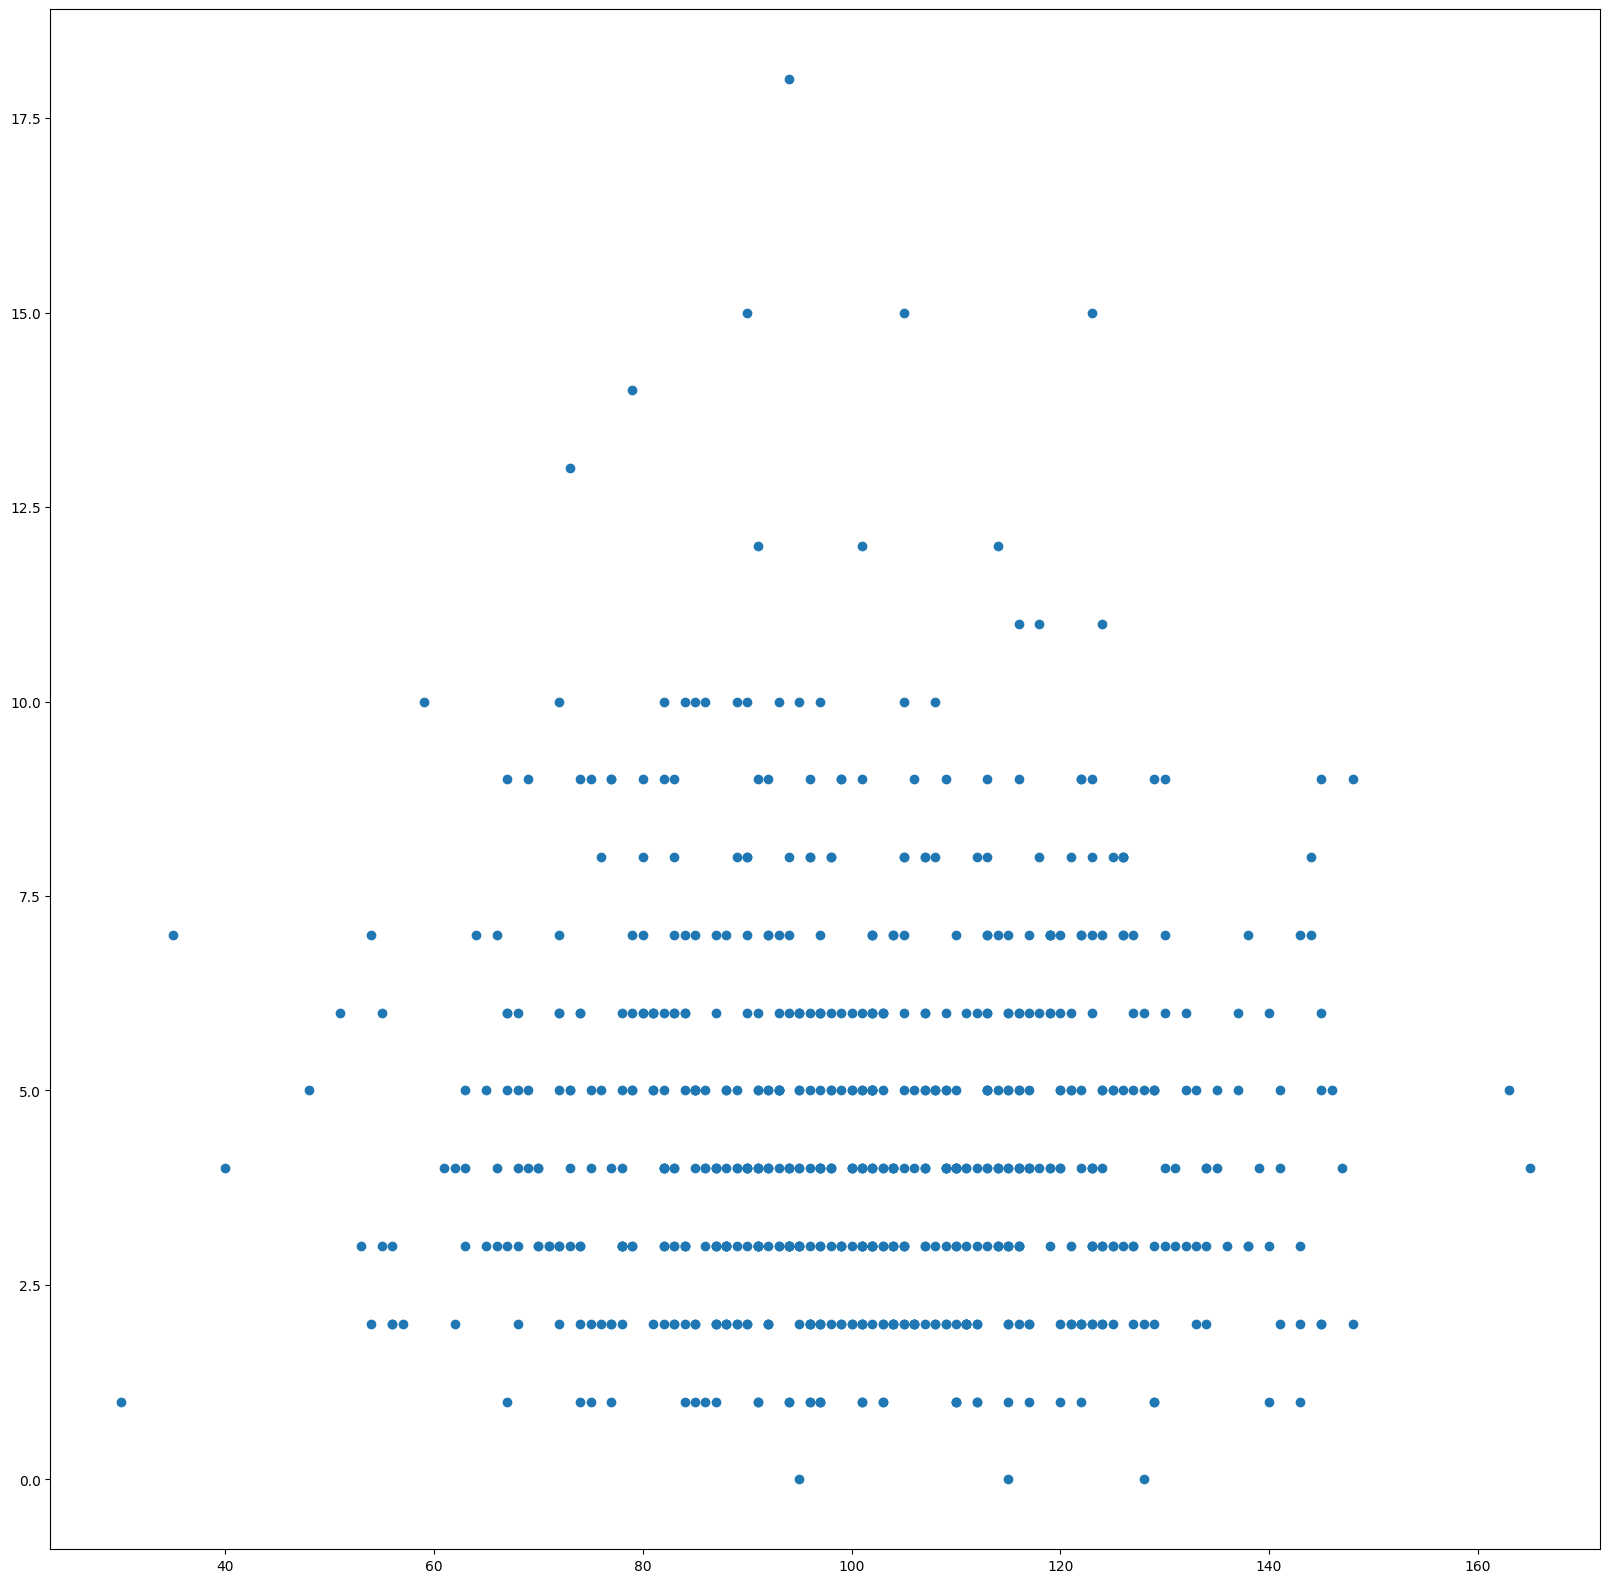

In [92]:
# На данном графике видно распределение общих дневных звонков и общее количество международных звонков. 
# На графике видно, что оснвоная масса международных звонков,а именно от 2 до 8 звонков, происходит в моменте от 80 до 130 дневных звонков
plt.figure(figsize=(20, 20))
plt.scatter(df['Total day calls'], df['Total intl calls'])
plt.show